# FORECASTING FOR TIME SERIES
* Load the data and get avg_number_of_vehicles
* Explore the time series and check stationarity
* Train test split
* Apply seasonal arima to get forecasted traffic data
* Plot the forecast with confidence intervals
* Calculate metrics for forecasted and actual values

In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('final_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   max_number_of_vehicles    10323 non-null  int64  
 1   minimum_speed             10323 non-null  int64  
 2   min_number_of_vehicles    10323 non-null  int64  
 3   average_speed             10323 non-null  float64
 4   avg_number_of_vehicles    10323 non-null  float64
 5   maximum_speed             10323 non-null  int64  
 6   date                      10323 non-null  object 
 7   average_felt_temperature  10323 non-null  float64
 8   average_road_temperature  10323 non-null  float64
 9   minimum_felt_temperature  10323 non-null  float64
 10  minimum_precipitation     10323 non-null  float64
 11  maximum_humidity          10323 non-null  float64
 12  maximum_felt_temperature  10323 non-null  float64
 13  maximum_precipitation     10323 non-null  float64
 14  maximu

In [9]:
df.head()

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02


# ARIMA MODEL FOR AVG TEMPERATURE

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
* q --> Order of MA (moving average term) 
* d --> Order of Differencing (to make the series stationary)

In [43]:
veh = df[['date', 'avg_number_of_vehicles']]
veh['date'] = pd.to_datetime(veh['date'])

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_2204/1995845488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh['date'] = pd.to_datetime(veh['date'])


In [44]:
veh = veh.set_index('date').resample(rule='D').mean()
veh

,avg_number_of_vehicles
date,
2020-01-01,64.340000
2020-01-02,101.829583
2020-01-03,98.977083
2020-01-04,91.401667
2020-01-05,66.213750
...,...
2021-04-24,68.164583
2021-04-25,45.016250
2021-04-26,91.155833


In [45]:
veh = veh['2021-01-01':'2021-04-28']
veh

,avg_number_of_vehicles
date,
2021-01-01,39.221250
2021-01-02,50.531250
2021-01-03,41.383043
2021-01-04,86.162083
2021-01-05,101.431250
...,...
2021-04-24,68.164583
2021-04-25,45.016250
2021-04-26,91.155833


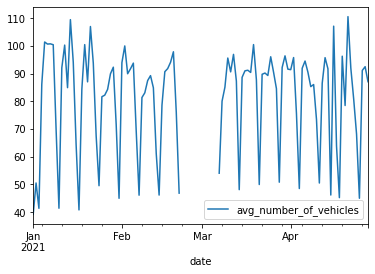

In [46]:
veh.plot();

In [48]:
set(veh.index.tolist())

{Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-03 00:00:00', freq='D'),
 Timestamp('2021-01-04 00:00:00', freq='D'),
 Timestamp('2021-01-05 00:00:00', freq='D'),
 Timestamp('2021-01-06 00:00:00', freq='D'),
 Timestamp('2021-01-07 00:00:00', freq='D'),
 Timestamp('2021-01-08 00:00:00', freq='D'),
 Timestamp('2021-01-09 00:00:00', freq='D'),
 Timestamp('2021-01-10 00:00:00', freq='D'),
 Timestamp('2021-01-11 00:00:00', freq='D'),
 Timestamp('2021-01-12 00:00:00', freq='D'),
 Timestamp('2021-01-13 00:00:00', freq='D'),
 Timestamp('2021-01-14 00:00:00', freq='D'),
 Timestamp('2021-01-15 00:00:00', freq='D'),
 Timestamp('2021-01-16 00:00:00', freq='D'),
 Timestamp('2021-01-17 00:00:00', freq='D'),
 Timestamp('2021-01-18 00:00:00', freq='D'),
 Timestamp('2021-01-19 00:00:00', freq='D'),
 Timestamp('2021-01-20 00:00:00', freq='D'),
 Timestamp('2021-01-21 00:00:00', freq='D'),
 Timestamp('2021-01-22 00:00:00', freq='D'),
 Timestamp

In [47]:
full_range = set(pd.date_range('2021-01-01', '2021-04-28', freq='D'))
veh_dates = set(veh.index.tolist())
missing_days = full_range.difference(veh_dates)
missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)
missing_days.values

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_2204/3244118368.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)


array([], dtype=float64)

In [38]:
veh_dates

{Timestamp('2020-01-01 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-03 00:00:00', freq='D'),
 Timestamp('2020-01-04 00:00:00', freq='D'),
 Timestamp('2020-01-05 00:00:00', freq='D'),
 Timestamp('2020-01-06 00:00:00', freq='D'),
 Timestamp('2020-01-07 00:00:00', freq='D'),
 Timestamp('2020-01-08 00:00:00', freq='D'),
 Timestamp('2020-01-09 00:00:00', freq='D'),
 Timestamp('2020-01-10 00:00:00', freq='D'),
 Timestamp('2020-01-11 00:00:00', freq='D'),
 Timestamp('2020-01-12 00:00:00', freq='D'),
 Timestamp('2020-01-13 00:00:00', freq='D'),
 Timestamp('2020-01-14 00:00:00', freq='D'),
 Timestamp('2020-01-15 00:00:00', freq='D'),
 Timestamp('2020-01-16 00:00:00', freq='D'),
 Timestamp('2020-01-17 00:00:00', freq='D'),
 Timestamp('2020-01-18 00:00:00', freq='D'),
 Timestamp('2020-01-19 00:00:00', freq='D'),
 Timestamp('2020-01-20 00:00:00', freq='D'),
 Timestamp('2020-01-21 00:00:00', freq='D'),
 Timestamp('2020-01-22 00:00:00', freq='D'),
 Timestamp

In [33]:
veh.iloc[int(len(veh)*0.95)]

avg_number_of_vehicles    48.528261
Name: 2021-04-04 00:00:00, dtype: float64

In [41]:
X = veh.loc['2021-01-01':'2021-03-27']
y = veh.loc['2021-03-27':]

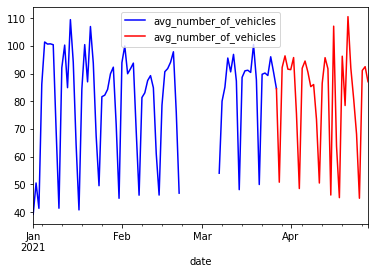

In [42]:
ax = X.plot(c='b')
y.plot(c='r', ax=ax)
plt.title
plt.show()

## Check if ts is stationary

In [23]:
#Test if stationary (Dicky Fuller test) - h0: Time series data is not stationary
from statsmodels.tsa.stattools import adfuller
def is_stationary(ts):
    results = adfuller(ts)
    print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")
    if results[1]<0.05:
        print('Time series data is stationary'),
    else:
        print('Time series data is not stationary')

In [24]:
is_stationary(X)

NameError: name 'X' is not defined

In [127]:
X.diff(7).dropna()

,avg_number_of_vehicles
date,
2020-01-08,12.514167
2020-01-09,-16.705833
2020-01-10,-5.205000
2020-01-11,-2.399583
2020-01-12,-0.231667
...,...
2020-03-23,-13.536667
2020-03-24,-13.047083
2020-03-25,-14.019583


In [128]:
is_stationary(X.diff(7).dropna())

Test Statistic: -3.242430136681288
P-Value: 0.017656328794842583
Critical Test stats for intervals: {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}

Time series data is stationary


In [129]:
from pmdarima.arima.utils import ndiffs
ndiffs(X.diff(7).dropna(), test='adf')

1

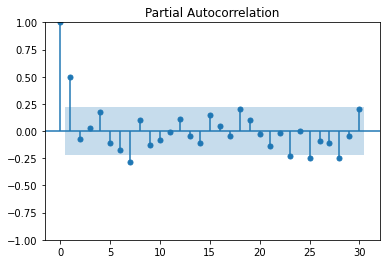

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(X.diff(7).dropna(), lags=30);

In [135]:
ser = X.diff(7).dropna().iloc[:,0]
ar0 = ser.corr(ser)
ar1 = ser.corr(ser.shift().dropna())
ar2 = ser.corr(ser.shift().shift().dropna())
ar0, ar1, ar2

(1.0, 0.5016016277380985, 0.1937104493883283)

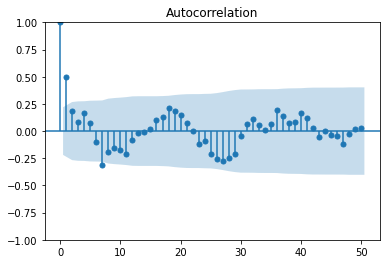

In [136]:
plot_acf(ser.reset_index(drop=True), lags=50);

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [138]:
model = SARIMAX(X, order=(1,1,1), seasonal_order=(1,1,1,7))
model = model.fit()
print(model.summary())

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:            avg_number_of_vehicles   No. Observations:                   87
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -279.163
Date:                           Sun, 10 Apr 2022   AIC                            568.326
Time:                                   21:20:31   BIC                            580.173
Sample:                               01-01-2020   HQIC                           573.072
                                    - 03-27-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5064      0.143      3.545      0.000       0.226       0.786
ma.L1         -0.8911      0.114     -7.783

In [139]:
forecast = model.get_forecast(len(y))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

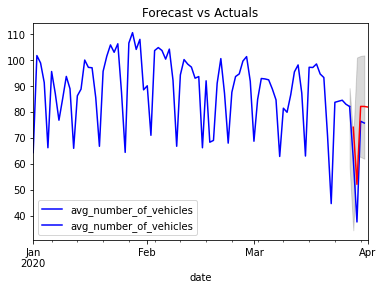

In [140]:
ax = X.plot(c='b')
y.plot(c='b', ax=ax)
fc.plot(c='r', ax=ax)
plt.fill_between(y.index, conf.iloc[:,0], conf.iloc[:,1], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.show()

In [141]:
fc

2020-03-28    74.121846
2020-03-29    52.074173
2020-03-30    82.180061
2020-03-31    82.166200
2020-04-01    81.927681
Freq: D, Name: predicted_mean, dtype: float64

## DECOMPOSITION

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [144]:
results = seasonal_decompose(X,period=30)

<Figure size 500x500 with 0 Axes>

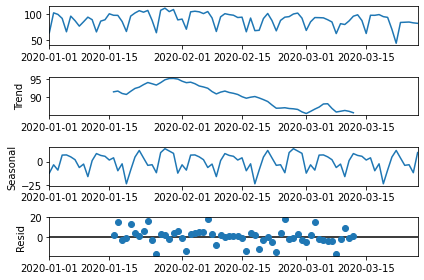

In [145]:
plt.figure(figsize=(100,100), dpi=5)
results.plot();

In [146]:
y.values

array([[82.14041667],
       [61.87083333],
       [37.51416667],
       [76.44333333],
       [75.75125   ]])

https://app.datacamp.com/learn/courses/time-series-analysis-in-python

In [147]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                  # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, y.iloc[:,0].values)

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_17492/937722734.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_17492/937722734.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.32060027927931306,
 'me': 7.7499920990083435,
 'mae': 14.876084638099602,
 'mpe': 0.2182159535333504,
 'rmse': 21.10077557139902,
 'acf1': -0.22987069156919296,
 'corr': 0.021666520631034667,
 'minmax': 0.18890241336606517}

### Auto Selection of ARIMA components 

In [148]:
import pmdarima as pm

In [155]:
automodel = pm.auto_arima(X, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0,  start_Q=0,
                      max_P=3, max_Q=3,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=700.496, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=639.716, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=666.729, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1031.386, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=696.543, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=663.533, Time=0.61 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=648.011, Time=0.23 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=667.341, Time=0.10 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=656.670, Time=0.12 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=641.890, Time=0.26 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=649.951, Time=0.24 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=640.932, Time=0.15 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=inf, Time=0.